Homework 1 - Zeri di Funzione

Definiamo le funzioni su cui applicare i metodi numerici

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

f1=lambda x: np.log(x+1)-x
f2=lambda x: x**2-np.cos(x)
f3=lambda x: np.sin(x)-(x/2)
f4=lambda x: np.exp(x)-3*x


#da incollare in sezione metodo punto fisso
g1=lambda x: np.log(x+1)
g2=lambda x: (np.cos(x))**(1/2)
g3=lambda x: 2*np.sin(x)
g4=lambda x: np.exp(x)/3

#da incollare in sezione metodo newton
df1=lambda x: 1/(x+1)-1
df2=lambda x: 2*x+np.sin(x)
df3=lambda x: np.cos(x)-(1/2)
df4=lambda x: np.exp(x)-3

Visualizziamo le varie funzioni sul grafico

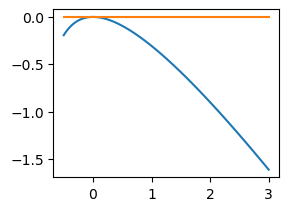

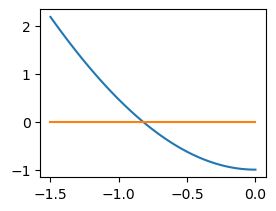

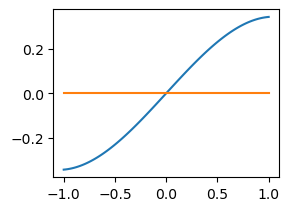

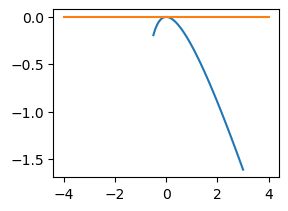

In [ ]:
a1=-0.5; b1=0; 
x1=np.linspace(a1,b1,100)
y1=f1(x1)
xAxis1=np.zeros_like(x1)

plt.subplot(2,2,1)
plt.plot(x1,y1)
plt.plot(x1,xAxis1)
plt.show()


a2=-1.5; b2=0; 
x2=np.linspace(a2,b2,100)
y2=f2(x2)
xAxis2=np.zeros_like(x2)

plt.subplot(2,2,2)
plt.plot(x2,y2)
plt.plot(x2,xAxis2)
plt.show()


a3=-1; b3=1; 
x3=np.linspace(a3,b3,100)
y3=f3(x3)
xAxis3=np.zeros_like(x3)

plt.subplot(2,2,3)
plt.plot(x3,y3)
plt.plot(x3,xAxis3)
plt.show()


a4=-4; b4=4; 
x4=np.linspace(a4,b4,100)
y4=f4(x4)
xAxis4=np.zeros_like(x4)

plt.subplot(2,2,4)
plt.plot(x1,y1)
plt.plot(x4,xAxis4)
plt.show()

Metodo di Bisezione

In [ ]:
def bisezione(fun,a,b,N):
    if(fun(a)*fun(b)<0):
        for i in range(N):
            c=(a+b)/2
            if(fun(a)*fun(c)<0):
                b=c
            elif(fun(b)*fun(c)<0):
                a=c
            if(fun(c)==0):
                break
        return c
    else:
        if(fun(a)==0):  #cambia perché non puoi fare i controlli con == ma con la tolleranza devi farli.
            return a
        elif(fun(b)==0):
            return b
        else:
            return 999

Applichiamo ora il metodo della bisezione sulle varie funzioni

In [52]:
iter=500

x1Star=bisezione(f1,a1,b1,iter)
print(f"Uno zero di f1 è in x={x1Star}")
f1val=f1(x1Star)
print(f"Il valore di f1 in x1Star è {f1val}")

x2Star=bisezione(f2,a2,b2,iter)
print(f"Uno zero di f2 è in x={x2Star}")
f2val=f2(x2Star)
print(f"Il valore di f1 in x2Star è {f2val}")

x3Star=bisezione(f3,a3,b3,iter)
print(f"Uno zero di f3 è in x={x3Star}")
f3val=f3(x3Star)
print(f"Il valore di f1 in x3Star è {f3val}")

x4Star=bisezione(f4,a4,b4,iter)
print(f"Uno zero di f4 è in x={x4Star}")
f4val=f4(x4Star)
print(f"Il valore di f1 in x1Star è {f4val}")

Uno zero di f1 è in x=999
Il valore di f1 in x1Star è -992.0922447210179
Uno zero di f2 è in x=-0.8241323123025224
Il valore di f1 in x2Star è -1.1102230246251565e-16
Uno zero di f3 è in x=0.0
Il valore di f1 in x3Star è 0.0
Uno zero di f4 è in x=999
Il valore di f1 in x1Star è inf


C:\Users\Locadmin\AppData\Local\Temp\ipykernel_32280\1171160011.py:7: RuntimeWarning: overflow encountered in exp
  f4=lambda x: np.exp(x)-3*x
